In [1]:
# This notebook illustrates handling the September 2024 Demo of the 18-month epi evaluation scenario 2 question 6b

# Import funman related code
import os
# from funman.api.run import Runner
from funman import MODE_ODEINT, MODE_SMT, Interval, LinearConstraint
# from funman import FunmanWorkRequest, EncodingSchedule 
import json
# from funman.representation.constraint import LinearConstraint, ParameterConstraint, StateVariableConstraint
# from funman.representation import Interval
import pandas as pd
import logging
import matplotlib.pyplot as plt

from helpers import run, get_model, setup_common, get_request, report


RESOURCES = "../../resources"
SAVED_RESULTS_DIR = "./out"

EXAMPLE_DIR = os.path.join(RESOURCES, "amr", "petrinet","monthly-demo", "2024-09")
REQUEST_PATH = os.path.join(
    EXAMPLE_DIR, "eval_scenario_base_request.json")

models = {
    "sidarthe_observables":  os.path.join(
    EXAMPLE_DIR, "SIDARTHE.model.with.observables.json"),
    "sirhd": os.path.join(
    EXAMPLE_DIR, "sirhd.json"),
    "sirhd-vac": os.path.join(
    EXAMPLE_DIR, "sirhd-vac.json"),
}

requests = {
    "sidarthe_observables": REQUEST_PATH,
    "sirhd-vac": os.path.join(EXAMPLE_DIR, "sirhd-vac-request.json"),
    "sirhd": None
}

states = {
    "sidarthe_observables": ['Susceptible', 'Diagnosed', 'Infected', 'Ailing', 'Recognized', 'Healed', 'Threatened', 'Extinct'],
    "sirhd": ["S", "I", "R", "H", "D"],
    "sirhd-vac": ["S_v", "I_v", "R_v", "H_v", "S_u", "I_u", "R_u", "H_u", "D"],
}


request_params = {}
request_results = {}


# %load_ext autoreload
# %autoreload 2

In [12]:
# Constants for the scenario

MAX_TIME=3
STEP_SIZE=1
timepoints = list(range(0, MAX_TIME+STEP_SIZE, STEP_SIZE))
# model_str = "sidarthe_observables"


1 points
                     N  beta_0  beta_1  beta_2  beta_3  phd_0  phd_1  phr_0  \
sirhd-vac  150000000.0    0.18    0.18    0.18    0.18   0.13   0.13   0.87   

           phr_1  pih_0  ...  pir_1  rhd_0  rhd_1  rhr_0  rhr_1  rih_0  rih_1  \
sirhd-vac   0.87    0.1  ...    0.9    0.3    0.3   0.07   0.07   0.07   0.07   

            rir       v_a       v_b  
sirhd-vac  0.07  0.449998  1.049996  

[1 rows x 22 columns]


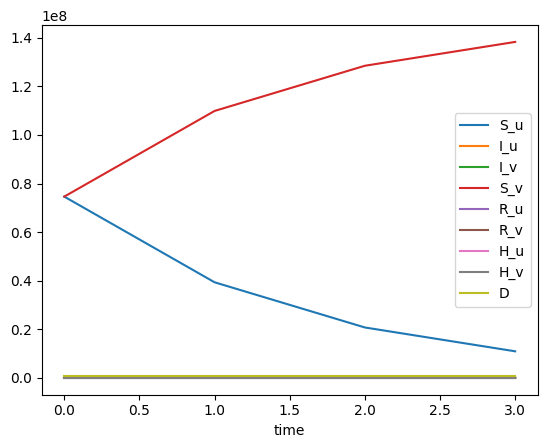

In [17]:
# Stratified Scenario that needs parameter adjustment

model_str = "sirhd-vac"
model = get_model(models[model_str])
to_plot = model[0]._state_var_names() + model[0]._observable_names()

funman_request = get_request(requests[model_str])
setup_common(funman_request, timepoints, debug=True, mode=MODE_SMT, synthesize=False,dreal_precision=0.1)
results = run(funman_request, model_str, models)
report(results, model_str, to_plot, request_results, request_params)

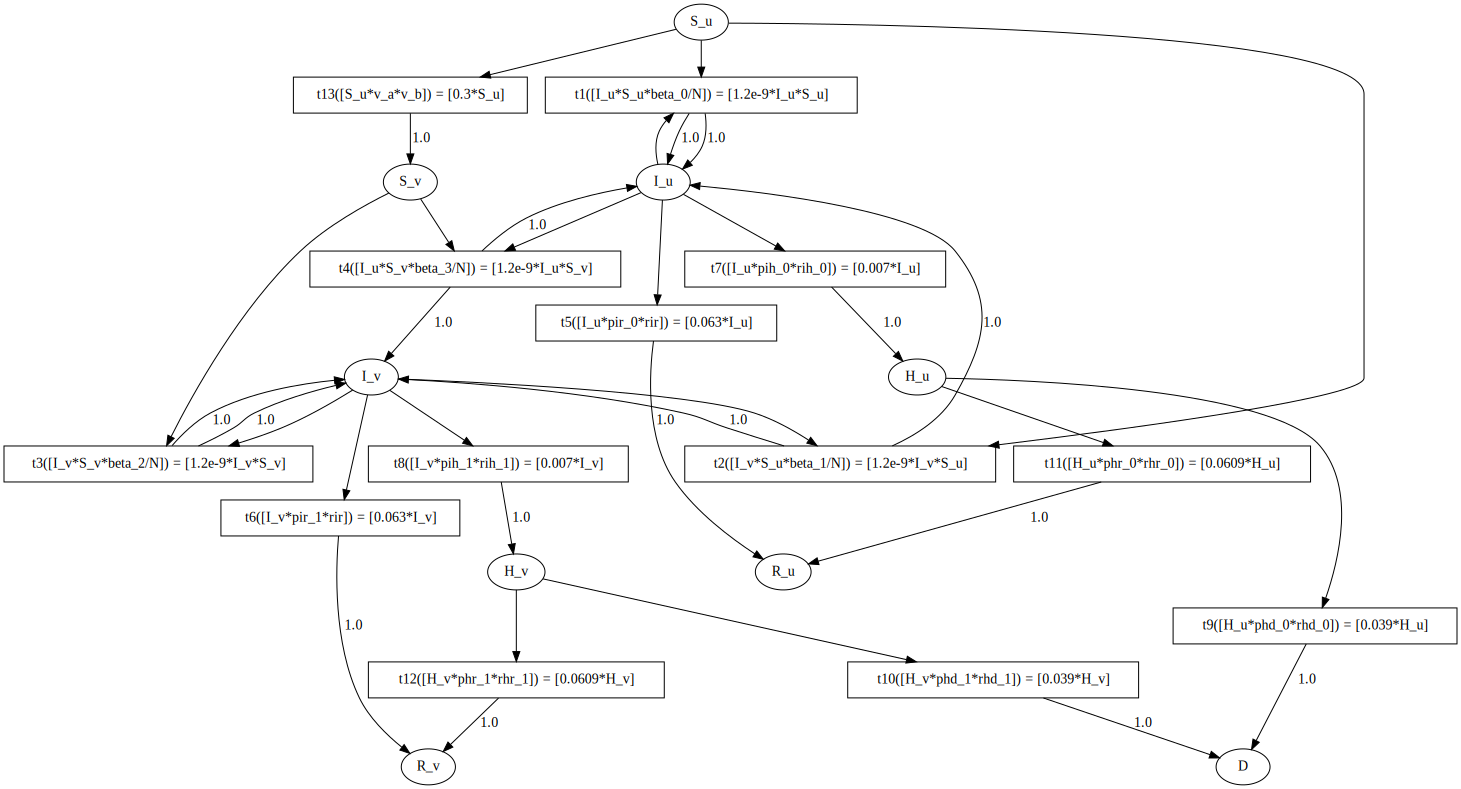

In [4]:
model[0].to_dot()

In [5]:
# Stratified Scenario that needs parameter adjustment
# Add constraint to reduce vaccination rate

model_str = "sirhd-vac"
model = get_model(models[model_str])
to_plot = model[0]._state_var_names() + model[0]._observable_names()

funman_request = get_request(requests[model_str])
setup_common(funman_request, timepoints, mode=MODE_SMT,debug=True)

# The number of unvaccinated Susceptible is not increasing
funman_request.constraints =[LinearConstraint(name="monotone_vaccination", variables=["S_u"], additive_bounds=Interval(ub=0, closed_upper_bound=True), derivative=True, soft=False)]


results = run(funman_request, model_str, models)
report(results, model_str, to_plot, request_results, request_params)

2024-09-25 15:42:06,500 - funman.funman - ERROR - funman.solve() exiting due to exception: KeyboardInterrupt(SIGINT) Detected.
2024-09-25 15:42:06,506 - funman.server.worker - ERROR - Internal Server Error (57d77b08-aee2-4617-8130-e39a1b13da5c):
Traceback (most recent call last):
  File "/root/funman/src/funman/server/worker.py", line 240, in _run
    result = f.solve(
  File "/root/funman/src/funman/funman.py", line 91, in solve
    raise e
  File "/root/funman/src/funman/funman.py", line 78, in solve
    result = problem.solve(
  File "/root/funman/src/funman/scenario/consistency.py", line 77, in solve
    parameter_space, models, consistent = search.search(
  File "/root/funman/src/funman/search/smt_check.py", line 60, in search
    model_result, explanation_result = self.expand(
  File "/root/funman/src/funman/search/smt_check.py", line 285, in expand
    model_result = self.solve_formula(s, formula, episode)
  File "/root/funman/src/funman/search/smt_check.py", line 206, in solve_

0 points
                     N  beta_0  beta_1  beta_2  beta_3  phd_0  phd_1  phr_0  \
sirhd-vac  150000000.0    0.18    0.18    0.18    0.18   0.13   0.13   0.87   

           phr_1  pih_0  ...  pir_1  rhd_0  rhd_1  rhr_0  rhr_1  rih_0  rih_1  \
sirhd-vac   0.87    0.1  ...    0.9    0.3    0.3   0.07   0.07   0.07   0.07   

            rir   v_a   v_b  
sirhd-vac  0.07  0.01  0.01  

[1 rows x 22 columns]
